# FSE - analisys

### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [1]:
import pandas as pd
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 2)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [2]:
solutions_dir = '/home/jmurana/code/jMetal/jmetal-fse'
instances_dir = '/home/jmurana/code/jMetal/jmetal-fse/instances/v1/'

## PLOT pareto

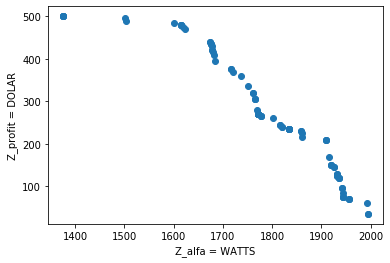

,Z_alfa,Z_profit
0,1376.0,500.0
1,1945.0,75.0
2,1772.0,270.0
3,1765.0,305.0
4,1956.0,70.0
5,1945.0,75.0
6,1772.0,270.0
7,1616.0,480.0
8,1778.0,265.0
9,1820.0,240.0


In [3]:
data = pd.DataFrame()
for filename in [f for f in os.listdir(solutions_dir +'/') if "FUN" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0,usecols=[0, 1] )
    data = data.dropna(axis=1, how='all')

data.columns = [['Z_alfa', 'Z_profit']] 
data.Z_alfa = -1 * data.Z_alfa
data.Z_profit = -1 * data.Z_profit

ax = plt.figure().add_subplot(111)
ax.scatter(data.Z_alfa, data.Z_profit)
ax.set_xlabel('Z_alfa = WATTS')
ax.set_ylabel('Z_profit = DOLAR')
plt.show()
data




## PLOT Intervals

Text(0, 0.5, 'WATTS')

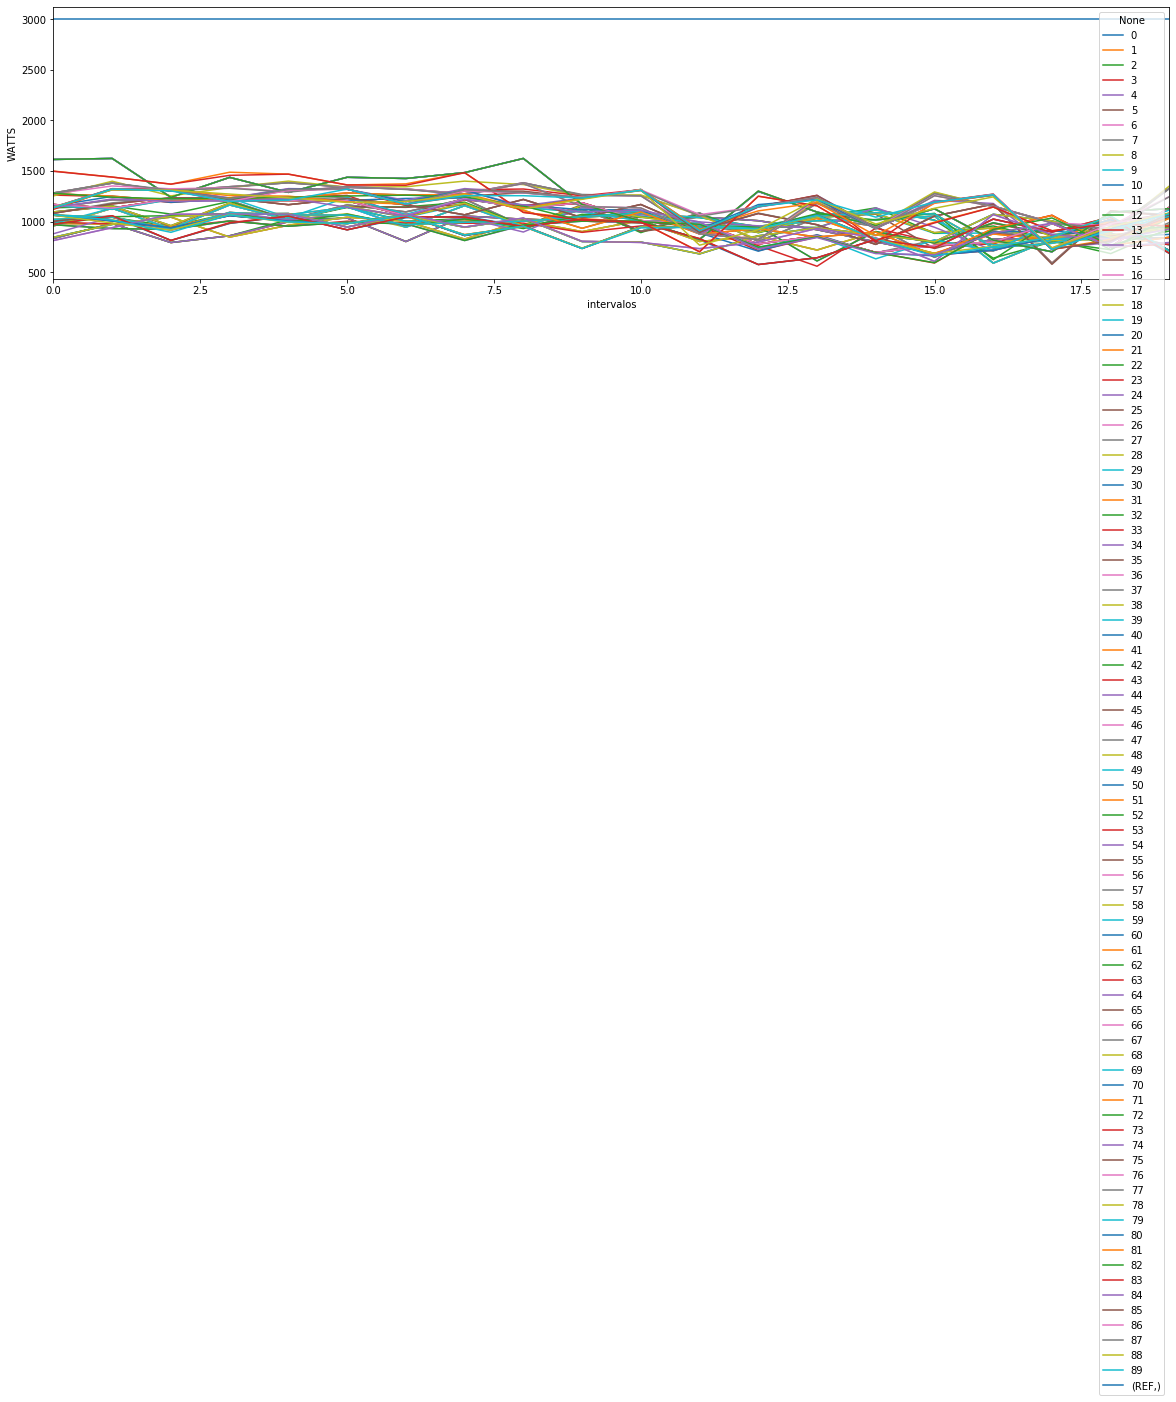

In [4]:
data = pd.DataFrame()

for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
    data = data.dropna(axis=1, how='all')

data_ref = pd.DataFrame()
for filename in [f for f in os.listdir(instances_dir +'/') if "ref" in f]:
    data_ref = pd.read_csv(instances_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
    data = data.dropna(axis=1, how='all')
data_ref = data_ref.T
data_ref.columns = [['REF']]  
    
cantidadRacks = 9
ax = data.T.groupby(data.T.index // cantidadRacks).sum().plot(figsize=(20,5))
data_ref.plot(ax=ax)
ax.set_xlabel('intervalos')
ax.set_ylabel('WATTS')

## PLOT servers

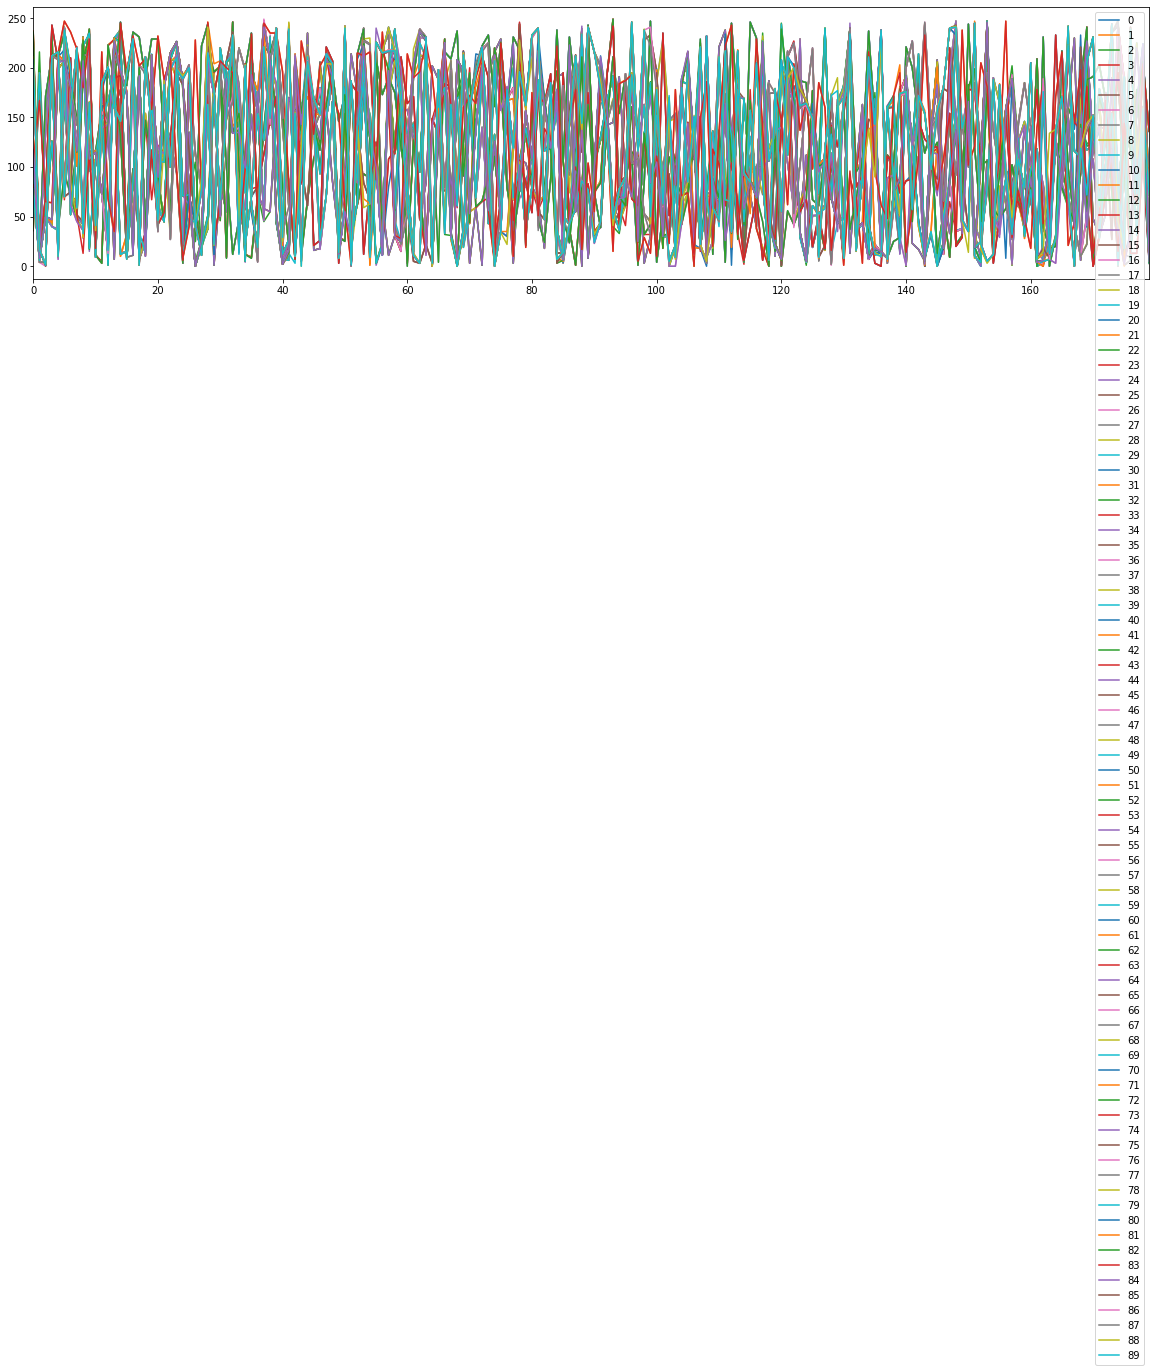

In [5]:
data = pd.DataFrame()

for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
    data = data.dropna(axis=1, how='all')
ax = data.T.plot(figsize=(20,5))


## PLOT server zero, one and two

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,223,12,172,212,212,235,191,147,210,230,...,191,203,168,75,18,143,117,62,206,136
1,76,16,145,227,37,165,75,51,42,234,...,48,31,52,190,7,107,46,115,204,83
2,116,6,50,47,211,207,180,123,229,108,...,121,142,74,114,243,188,10,162,205,4
3,231,17,1,212,216,70,75,221,39,164,...,152,61,135,27,237,88,241,101,159,10
4,79,10,70,236,28,240,72,50,197,239,...,0,29,150,143,190,92,14,178,113,24
5,76,16,145,227,37,165,75,51,42,234,...,48,31,52,190,7,107,46,115,204,83
6,116,6,50,47,211,207,180,123,229,108,...,121,142,74,114,243,188,10,162,205,4
7,229,4,4,212,211,84,181,145,213,213,...,151,140,139,236,242,135,117,96,210,15
8,49,180,50,41,199,207,71,113,230,116,...,123,168,66,117,39,1,6,161,205,7
9,36,195,50,41,199,207,72,64,231,114,...,123,170,66,116,41,192,6,163,206,7


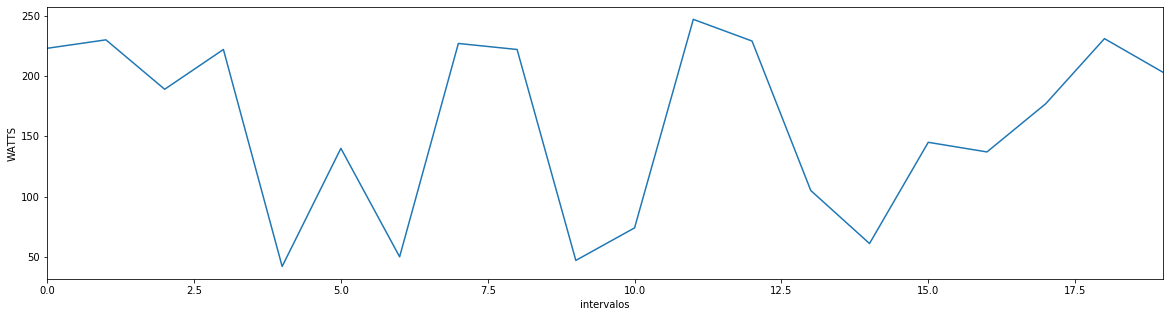

In [6]:
data = pd.DataFrame()

for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ')
     # drop the columns where all elements are NaN:
    data = data.dropna(axis=1, how='all')
    
serversNumber = 9
intervalsNumber = 20
ax = data.T[0][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
#data.T[1][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
#data.T[2][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
ax.set_xlabel('intervalos')
ax.set_ylabel('WATTS')
data